In [1]:
import numpy as np
from astropy.io import fits
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline
rc('figure', figsize=(12.0, 9.0))

In [2]:
biases = []
for i in range(1,11):
    zeros = (8-len(str(i)))*'0'
    biases.append(fits.getdata('bias/tBias'+zeros+'{}.fit'.format(i) , ext=0).astype(np.int))
    
avg_bias = np.asarray(biases).mean(axis=0) #Creates an average bias frame to subtract from all measurements   

In [3]:
# Neon lamp
lamp_on  = []
lamp_off = []

sun_on  = []
sun_off = []

for i in range(11,16):
    zeros = (8-len(str(i)))*'0'
    sun_on.append(fits.getdata('sun_on/t'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))
    
for i in range(16,21):
    zeros = (8-len(str(i)))*'0'
    sun_off.append(fits.getdata('sun_off/t'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))
    
for i in range(1,4):
    zeros = (8-len(str(i)))*'0'
    lamp_on.append(fits.getdata('lamp_on/A'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))

for i in range(4,7):
    zeros = (8-len(str(i)))*'0'
    lamp_off.append(fits.getdata('lamp_off/A'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))

# for i in range(21,24):
#     zeros = (8-len(str(i)))*'0'
#     lamp_on.append(fits.getdata('test_He/t'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))
    
# for i in range(24,27):
#     zeros = (8-len(str(i)))*'0'
#     lamp_off.append(fits.getdata('test_He/t'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))

In [4]:
lamp_on_sub_bias = [lamp - avg_bias for lamp in lamp_on]
lamp_off_sub_bias = [lamp - avg_bias for lamp in lamp_off]
sun_on_sub_bias = [sun - avg_bias for sun in sun_on]
sun_off_sub_bias = [sun - avg_bias for sun in sun_off]

avg_lamp_off = np.asarray(lamp_off_sub_bias).mean(axis=0)
avg_sun_off = np.asarray(sun_off_sub_bias).mean(axis=0)

In [5]:
lamp_corrected = [lamp_on - avg_lamp_off for lamp_on in lamp_on_sub_bias]
sun_corrected  = [sun_on - avg_sun_off for sun_on in sun_on_sub_bias]

avg_lamp = np.asarray(lamp_corrected).mean(axis=0)
avg_sun = np.asarray(sun_corrected).mean(axis=0)

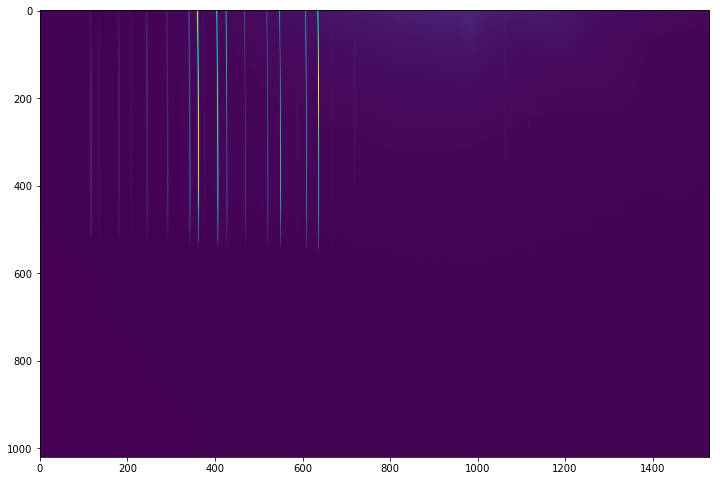

In [6]:
plt.imshow(avg_lamp)
plt.show()

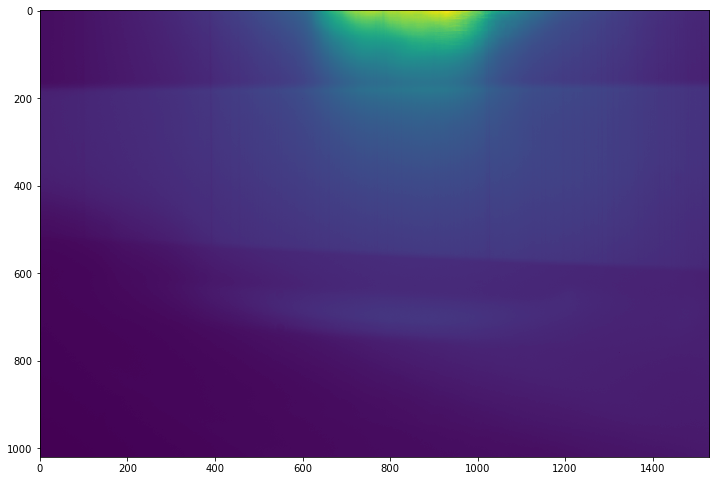

In [7]:
plt.imshow(avg_sun)
plt.show()

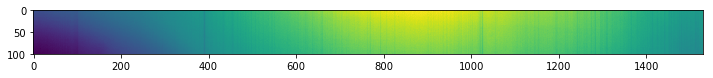

In [8]:
plt.imshow(avg_sun[400:500,:])

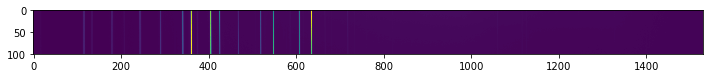

In [9]:
plt.imshow(avg_lamp[200:300,:])

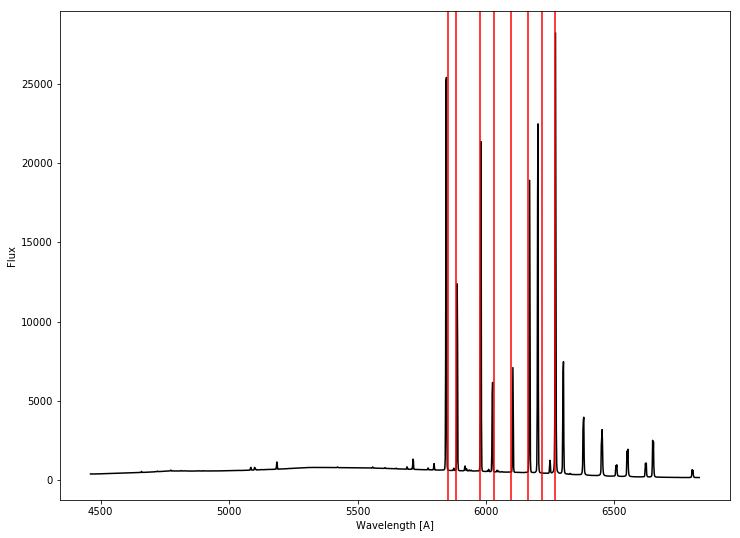

In [10]:
lamp_good_reversed = np.flip(np.asarray(avg_lamp[200:300,:]).mean(axis=0),0) #Averages the value along each column in the region that our spectra look relatively free of contamination

stretch_factor = 1.55
shift_factor = 4460


# Krypton_lines = [5649.56,5681.89,5690.35,5832.86,5870.91,5992.22,5993.85,6056.13,6420.18,6421.03,6456.29,6570.07] #emission line vector of krypton
Neon_lines = [5852.49,5881.90,5975.53,6030,6096.16,6163.59,6217.28,6266.50]
# He_lines = [5875.62,6678.15,7065.19]

plt.plot(np.arange(len(lamp_good_reversed))*stretch_factor+shift_factor, lamp_good_reversed, 'k-')
for line in Neon_lines:
    plt.axvline(line,color='r')
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux')
plt.show()

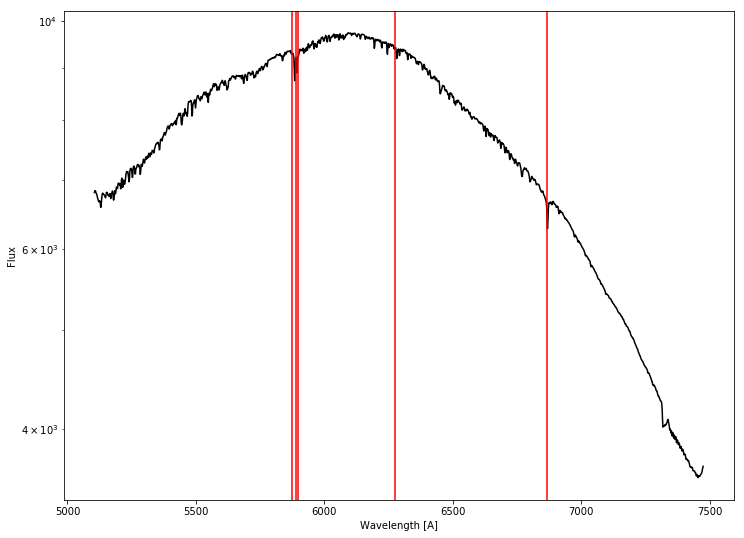

In [13]:
sun_good_reversed  = np.flip(np.asarray(avg_sun[400:500,:]).mean(axis=0),0)

stretch_factor = 1.55
shift_factor = 5105

solar_lines = [5875.618,5895.92,5889.95,6276.61,6867.19]

plt.plot(np.arange(len(sun_good_reversed))*stretch_factor+shift_factor, sun_good_reversed, 'k-')
for line in solar_lines:
    plt.axvline(line,color='r')
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux')
plt.yscale('log')
plt.show()

In [14]:
5764.42,5852.49,5872.83,5881.90,5944.83,5965.47,5974.63,5975.53,5987.91,6030.00,6074.34,6096.16,6143.06,6163.59,6182.15,6217.28,6266.50,6334.43,6382.99,6402.25,6506.53

SyntaxError: invalid syntax (<ipython-input-14-1975d67de2cd>, line 1)

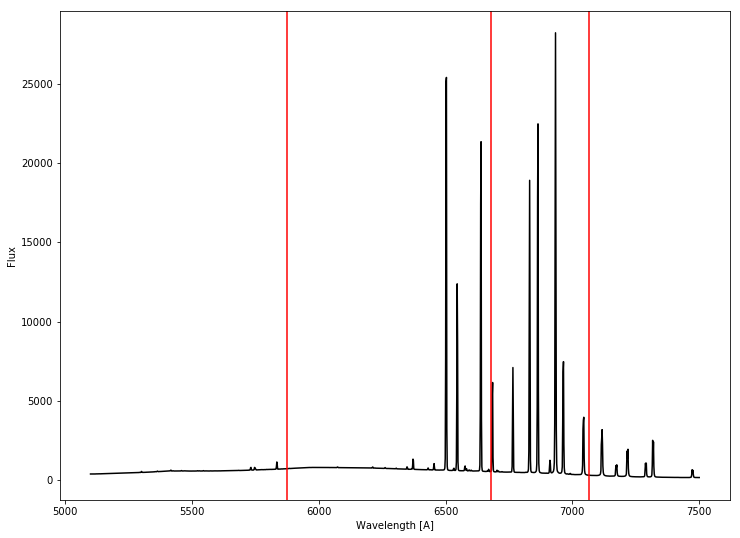

In [11]:
lamp_good_reversed = np.flip(np.asarray(avg_lamp[200:300,:]).mean(axis=0),0) #Averages the value along each column in the region that our spectra look relatively free of contamination

stretch_factor = 1.57
shift_factor = 5100


# Krypton_lines = [5649.56,5681.89,5690.35,5832.86,5870.91,5992.22,5993.85,6056.13,6420.18,6421.03,6456.29,6570.07] #emission line vector of krypton
# Neon_lines = [5852.49,6182.15,6402.25]
He_lines = [5875.62,6678.15,7065.19]

plt.plot(np.arange(len(lamp_good_reversed))*stretch_factor+shift_factor, lamp_good_reversed, 'k-')
for line in He_lines:
    plt.axvline(line,color='r')
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux')
plt.show()

In [ ]:
,6143.06,6163.59,6182.15,6217.28,6266.50,6334.43,6382.99,6402.25,
    6506.53,6598.95,6678.28,6929.47,7024.05,7032.41,7059.11